In [96]:
import networkx as nx
import matplotlib.pyplot as plt

### Gnp (n=1000, p=0.01)

Is the graph connected? True


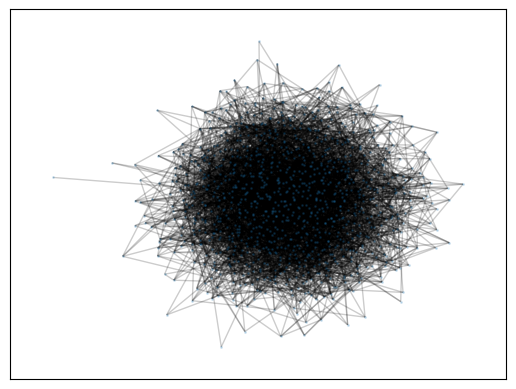

In [97]:
gnp = nx.erdos_renyi_graph(1000, 0.01, seed=8880)
nx.draw_networkx(gnp, node_size=1, alpha=0.2, with_labels=False)
print("Is the graph connected?", nx.is_connected(gnp))

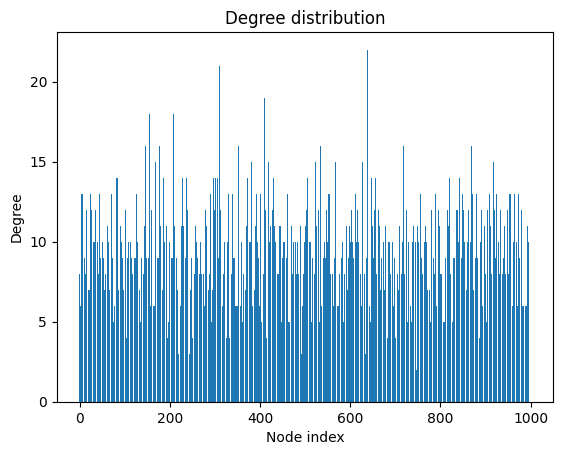

In [98]:
# plot node degrees
degree_sequence = [d for n, d in gnp.degree()]
plt.bar(list(range(0,len(degree_sequence))), degree_sequence)
plt.xlabel('Node index')
plt.ylabel('Degree')
plt.title('Degree distribution')
plt.show()

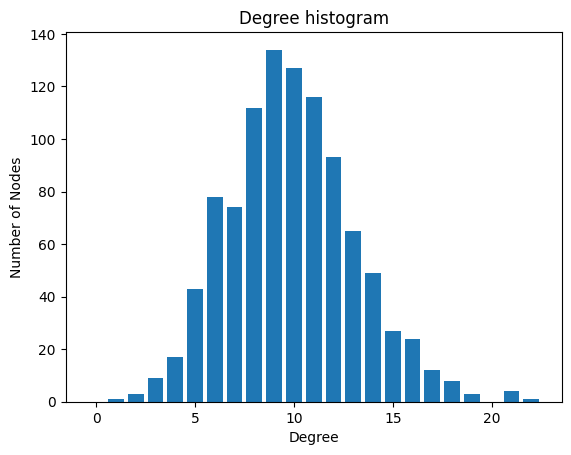

In [99]:
# calculate the degree histogram and plot it
dh = nx.degree_histogram(gnp)
dgs = list(range(0,len(dh)))
plt.bar(dgs, dh)
plt.xlabel('Degree')
plt.ylabel('Number of Nodes')
plt.title('Degree histogram')
plt.show()

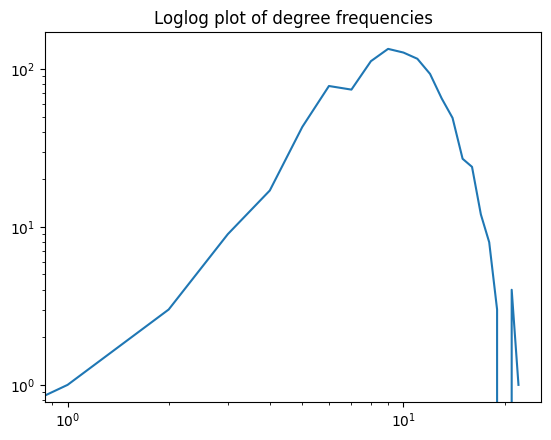

In [100]:
# loglog plot of the degree frequencies
plt.loglog(dgs,dh)
plt.title("Loglog plot of degree frequencies")
plt.show()

In [101]:
print("\nThe graph has a clustering coefficient of", nx.average_clustering(gnp),
      "an average shortest path length of", nx.average_shortest_path_length(gnp),
      "and a density of", nx.density(gnp))


The graph has a clustering coefficient of 0.009184879344941266 an average shortest path length of 3.2688088088088088 and a density of 0.009907907907907907


### Gnm (n=1000, m=10000)

Is the graph connected? True


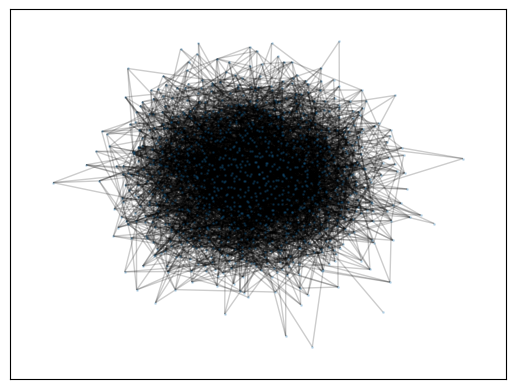

In [102]:
gnm = nx.gnm_random_graph(1000, 10000, seed=8880)
nx.draw_networkx(gnp, node_size=1, alpha=0.2, with_labels=False)
print("Is the graph connected?", nx.is_connected(gnp))

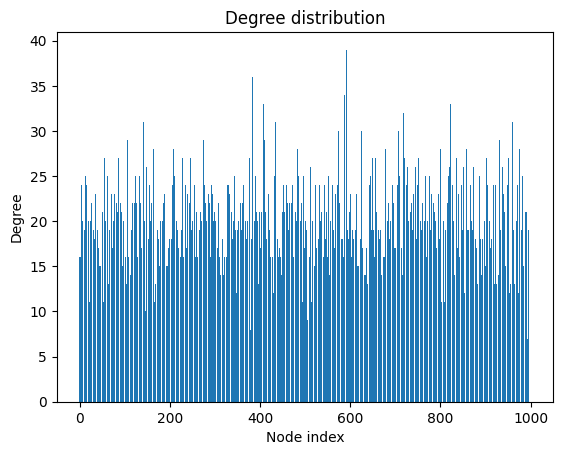

In [103]:
# plot node degrees
degree_sequence = [d for n, d in gnm.degree()]
plt.bar(list(range(0,len(degree_sequence))), degree_sequence)
plt.xlabel('Node index')
plt.ylabel('Degree')
plt.title('Degree distribution')
plt.show()

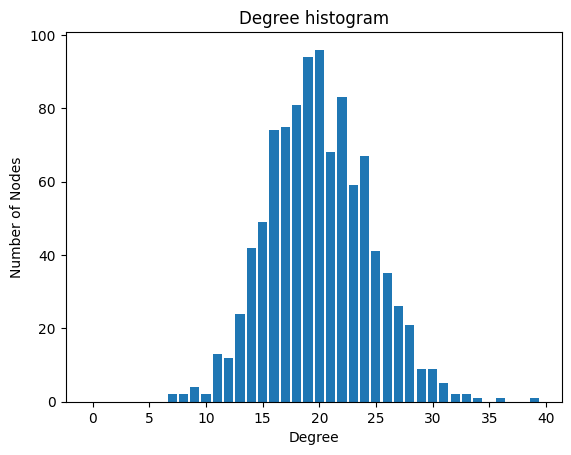

In [104]:
# calculate the degree histogram and plot it
dh = nx.degree_histogram(gnm)
dgs = list(range(0, len(dh)))
plt.bar(dgs, dh)
plt.xlabel('Degree')
plt.ylabel('Number of Nodes')
plt.title('Degree histogram')
plt.show()

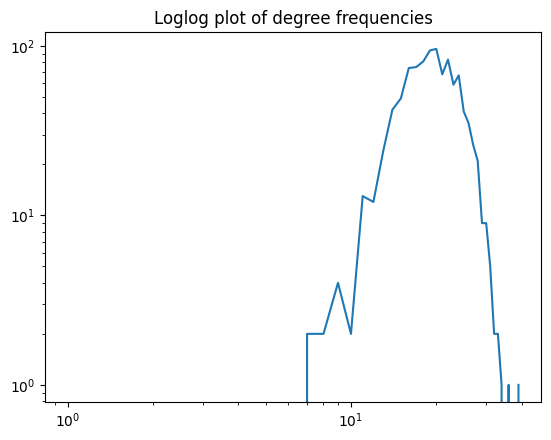

In [105]:
# loglog plot of the degree frequencies
plt.loglog(dgs,dh)
plt.title("Loglog plot of degree frequencies")
plt.show()

In [106]:
print("\nThe graph has a clustering coefficient of", nx.average_clustering(gnp),
      "an average shortest path length of", nx.average_shortest_path_length(gnp),
      "and a density of", nx.density(gnp))


The graph has a clustering coefficient of 0.009184879344941266 an average shortest path length of 3.2688088088088088 and a density of 0.009907907907907907


И двете мрежи имаат поасонова распределба на степените.

### Големината на џиновската компонента во Ердош-Рени мрежа со 1000 јазли, зависно од p

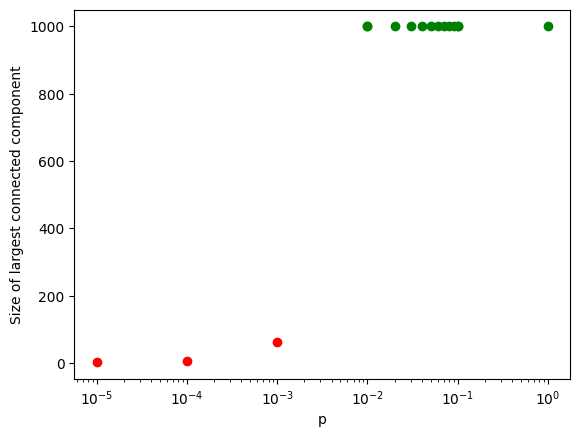

In [107]:
p_values = [10**(-i) for i in range(6)] + [j/100 for j in range(1, 11)]

# Calculate the size of the largest connected component for each p value
largest_cc_sizes = []
for p in p_values:
    G = nx.erdos_renyi_graph(1000, p, seed=8880)
    largest_cc = max(nx.connected_components(G), key=len)
    largest_cc_size = len(largest_cc)
    largest_cc_sizes.append(largest_cc_size)

    if nx.is_connected(G):
        color = 'green'
    else:
        color = 'red'

    plt.scatter(p, largest_cc_size, color=color)

plt.xscale('log')
plt.xlabel('p')
plt.ylabel('Size of largest connected component')
plt.show()

Големината на џиновската компонента нагло се зголемува кога p ~ 0.01. Црвена = графот не е поврзан, зелена = графот е поврзан за оваа вредност на p.

### Поврзана случајна мрежа за p = 0.008

Is the graph connected? True


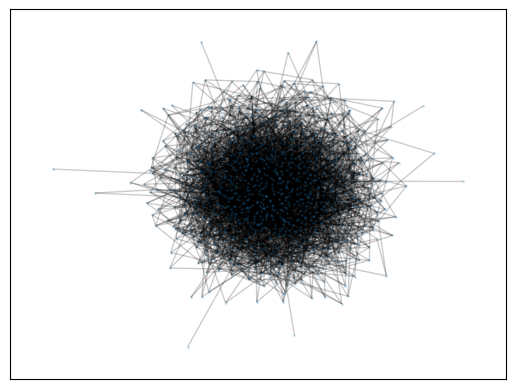

In [108]:
gnp = nx.erdos_renyi_graph(1000, 0.008, seed=8880)
nx.draw_networkx(gnp, node_size=1, alpha=0.2, with_labels=False)
print("Is the graph connected?", nx.is_connected(gnp))

### Силно поврзан насочен случаен граф за p = 0.06

Is the graph strongly connected? True
Is the graph weakly connected? True


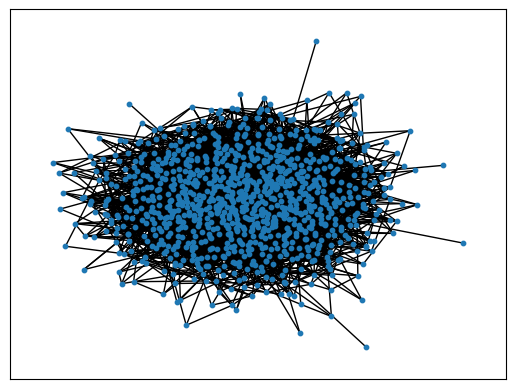

In [109]:
ER = nx.erdos_renyi_graph(100, 0.06, directed=True)

nx.draw_networkx(gnp, node_size=10, with_labels=False)
print("Is the graph strongly connected?",nx.is_strongly_connected(ER))
print("Is the graph weakly connected?",nx.is_weakly_connected(ER))

### Барабаши-Алберт мрежа со m=3, n=1000

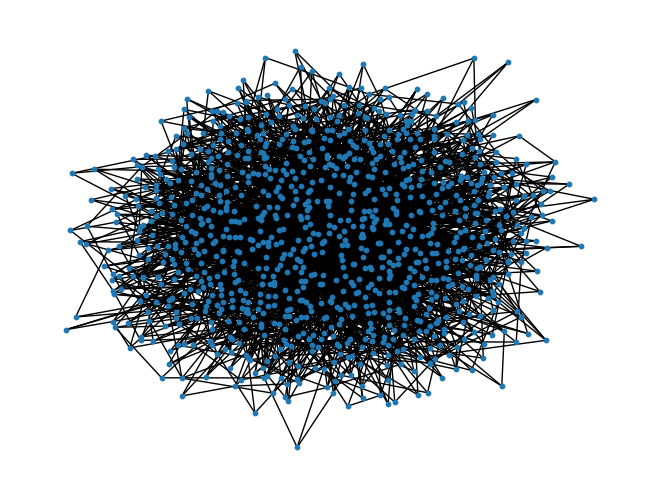

In [110]:
n = 1000
m = 3
G = nx.barabasi_albert_graph(n, m)
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=False, node_size=10)
plt.show()

### Коефициентот на кластерирање и дијаметарот во Барабаши-Алберт мрежа со 1000 јазли за различни вредности на m

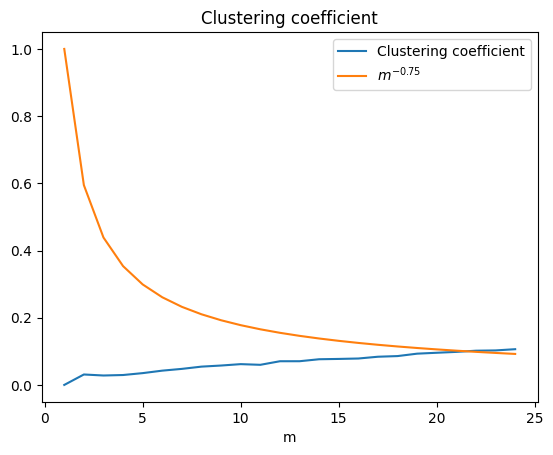

/tmp/ipykernel_17519/665358680.py:26: RuntimeWarning: divide by zero encountered in log
  plt.plot(m_values, [np.log(m)/(np.log(np.log(m))) for m in m_values], label='$log(m)/log(log(m))$')


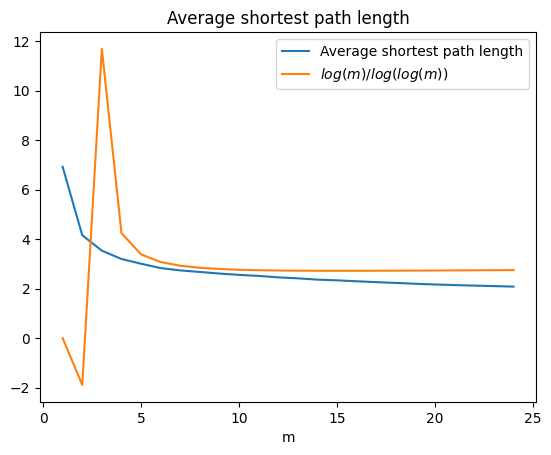

In [111]:
import numpy as np

n = 1000
m_values = range(1, 25)

clustering_coeffs = []
path_lengths = []

for m in m_values:
    G = nx.barabasi_albert_graph(n, m, seed=8880)
    clustering_coeff = nx.average_clustering(G)
    path_length = nx.average_shortest_path_length(G)
    clustering_coeffs.append(clustering_coeff)
    path_lengths.append(path_length)

# Plot the clustering coefficient
plt.plot(m_values, clustering_coeffs, label='Clustering coefficient')
plt.plot(m_values, [m**(-0.75) for m in m_values], label='$m^{-0.75}$')
plt.title("Clustering coefficient")
plt.xlabel("m")
plt.legend()
plt.show()

# Plot the average shortest path length
plt.plot(m_values, path_lengths, label='Average shortest path length')
plt.plot(m_values, [np.log(m)/(np.log(np.log(m))) for m in m_values], label='$log(m)/log(log(m))$')
plt.title("Average shortest path length")
plt.xlabel("m")
plt.legend()
plt.show()

Портокаловите функции се нацртани за асимптотска споредба со својствата како функции од m.

И двете карактеристики се приближуваат кон карактеристиките на емпириските мрежи („голем“ коеф. на кластерирање и „мала“ просечна должина на најкраток пат) со растењето на m. Третата карактерситика веќе ја задоволуваат, зашто распределбата на степените кај Барабаши-Алберт мрежите следи степенов закон т.е. пропорционална е со x^-3.

### Ватс-Строгатц мрежа со 1000 јазли, k=4 линкови по јазол и веројатност за преповрзување p=0.1

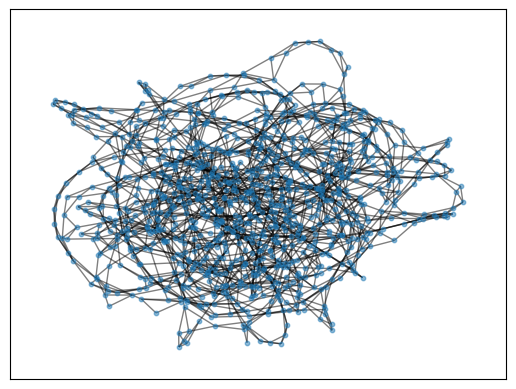

In [129]:
ws = nx.connected_watts_strogatz_graph(1000,4,0.1)
nx.draw_networkx(ws, with_labels=False, node_size=10, alpha=0.5)

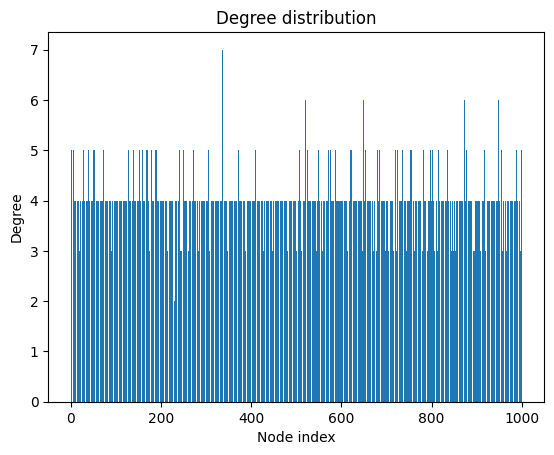

In [130]:
# plot node degrees
degree_sequence = [d for n, d in ws.degree()]
plt.bar(list(range(0,len(degree_sequence))), degree_sequence)
plt.xlabel('Node index')
plt.ylabel('Degree')
plt.title('Degree distribution')
plt.show()

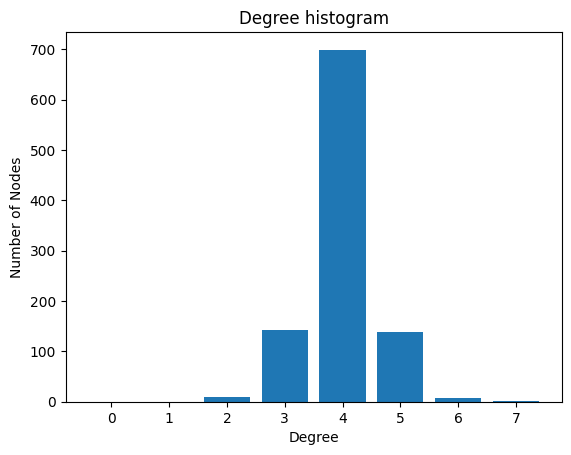

In [132]:
# calculate the degree histogram and plot it
dh = nx.degree_histogram(ws)
dgs = list(range(0, len(dh)))
plt.bar(dgs, dh)
plt.xlabel('Degree')
plt.ylabel('Number of Nodes')
plt.title('Degree histogram')
plt.show()

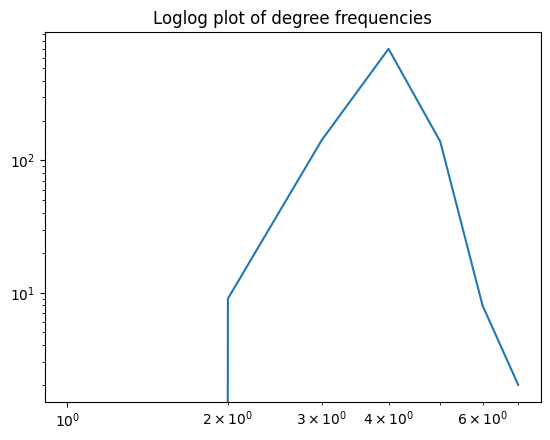

In [133]:
# loglog plot of the degree frequencies
plt.loglog(dgs,dh)
plt.title("Loglog plot of degree frequencies")
plt.show()

Распределбата на степените не следи степенов закон.

In [134]:
print("\nThe graph has a clustering coefficient of", nx.average_clustering(ws),
      "an average shortest path length of", nx.average_shortest_path_length(ws),
      "and a density of", nx.density(ws))


The graph has a clustering coefficient of 0.37241904761904715 an average shortest path length of 8.753451451451452 and a density of 0.004004004004004004


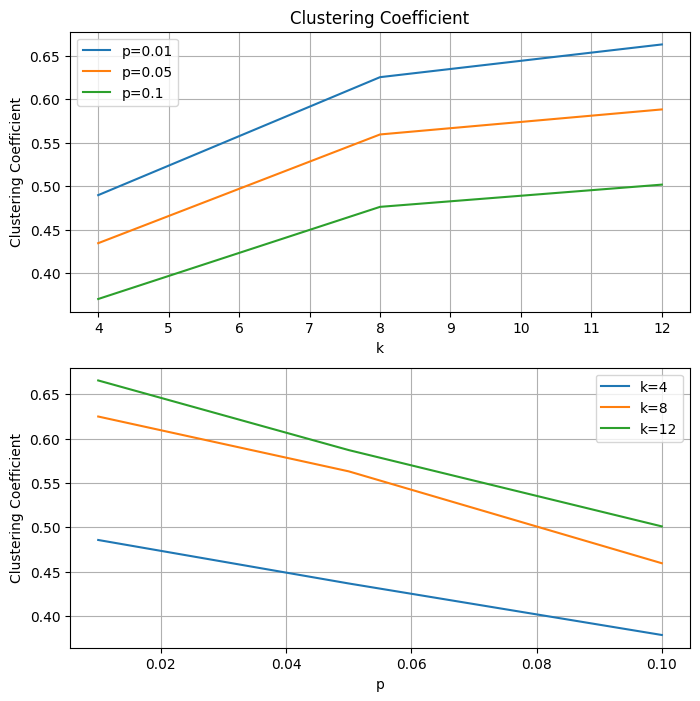

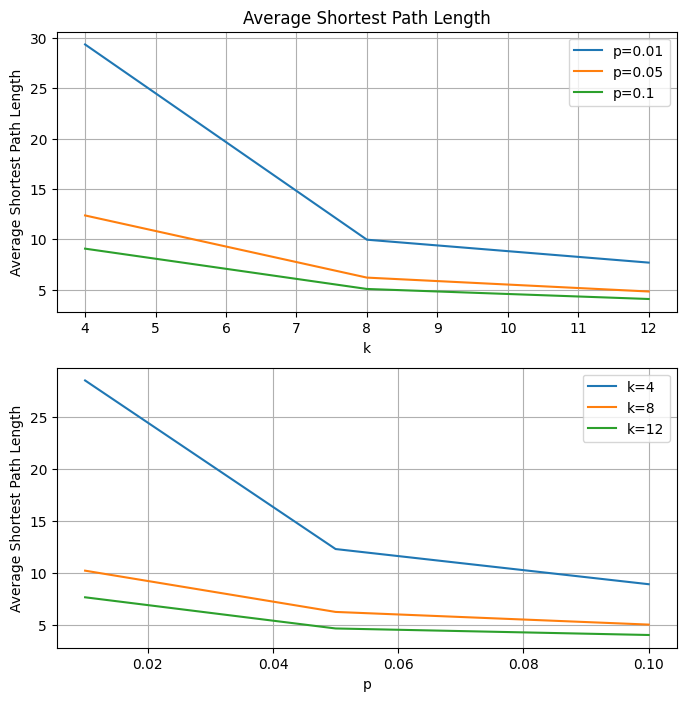

In [135]:
import networkx as nx
import matplotlib.pyplot as plt

n = 1000
p_values = [0.01, 0.05, 0.1]
k_values = [4, 8, 12]

# Clustering Coefficient
fig, axs = plt.subplots(2, 1, figsize=(8,8))

for p in p_values:
    clustering_coeffs = []
    for k in k_values:
        ws = nx.connected_watts_strogatz_graph(n, k, p)
        clustering_coeff = nx.average_clustering(ws)
        clustering_coeffs.append(clustering_coeff)
    axs[0].plot(k_values, clustering_coeffs, label='p={}'.format(p))

axs[0].set_title('Clustering Coefficient')
axs[0].set_xlabel('k')
axs[0].set_ylabel('Clustering Coefficient')
axs[0].legend()
axs[0].grid()

for k in k_values:
    clustering_coeffs = []
    for p in p_values:
        ws = nx.connected_watts_strogatz_graph(n, k, p)
        clustering_coeff = nx.average_clustering(ws)
        clustering_coeffs.append(clustering_coeff)
    axs[1].plot(p_values, clustering_coeffs, label='k={}'.format(k))

axs[1].set_xlabel('p')
axs[1].set_ylabel('Clustering Coefficient')
axs[1].legend()
axs[1].grid()

# Average Shortest Path Length
fig, axs = plt.subplots(2, 1, figsize=(8,8))

for p in p_values:
    path_lengths = []
    for k in k_values:
        ws = nx.connected_watts_strogatz_graph(n, k, p)
        path_length = nx.average_shortest_path_length(ws)
        path_lengths.append(path_length)
    axs[0].plot(k_values, path_lengths, label='p={}'.format(p))

axs[0].set_title('Average Shortest Path Length')
axs[0].set_xlabel('k')
axs[0].set_ylabel('Average Shortest Path Length')
axs[0].legend()
axs[0].grid()

for k in k_values:
    path_lengths = []
    for p in p_values:
        ws = nx.connected_watts_strogatz_graph(n, k, p)
        path_length = nx.average_shortest_path_length(ws)
        path_lengths.append(path_length)
    axs[1].plot(p_values, path_lengths, label='k={}'.format(k))

axs[1].set_xlabel('p')
axs[1].set_ylabel('Average Shortest Path Length')
axs[1].legend()
axs[1].grid()

plt.show()

Просечната должина на најкраток пат се подобрува со зголемување на двата параметри, додека за подобар коефициент на кластерирање пожелни се помали вредности за p, а поголеми за k.